In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
def _normalize(df):
    df = df.melt(
        id_vars=["areaName", "Borough", "areaType"], 
        value_vars=list(df.columns[3:]),
        var_name='date', 
        value_name='value',
    )
    df["date"] = pd.to_datetime(df["date"])
    return df

In [4]:
def get_median_asking_rent():
    df = pd.read_csv('RentData051022/medianAskingRent_All.csv')
    return _normalize(df)

In [5]:
def get_discount_share():
    df =  pd.read_csv('RentData051022/discountShare_All.csv')
    return _normalize(df)

In [6]:
def get_rental_inventory():
    df = pd.read_csv('RentData051022/rentalInventory_All.csv')
    return _normalize(df)

In [7]:
def get_rental_index():
    df = pd.read_csv('RentData051022/rentalIndex_All.csv')
    df = df.rename(columns={"Month": "date"})
    df["date"] = pd.to_datetime(df["date"])
    return df

### Rental_inventory Graphs

In [11]:
rental_inventory = get_rental_inventory()
rental_inventory.head(10)

,areaName,Borough,areaType,date,value
0,All Downtown,Manhattan,submarket,2010-01-01,4268
1,All Midtown,Manhattan,submarket,2010-01-01,3065
2,All Upper East Side,Manhattan,submarket,2010-01-01,2549
3,All Upper Manhattan,Manhattan,submarket,2010-01-01,848
4,All Upper West Side,Manhattan,submarket,2010-01-01,2162
5,Astoria,Queens,neighborhood,2010-01-01,102
6,Auburndale,Queens,neighborhood,2010-01-01,2
7,Bath Beach,Brooklyn,neighborhood,2010-01-01,2
8,Battery Park City,Manhattan,neighborhood,2010-01-01,213
9,Bay Ridge,Brooklyn,neighborhood,2010-01-01,47


In [17]:
rental_inventory.areaType.unique()

array(['submarket', 'neighborhood', 'borough', 'city'], dtype=object)

In [28]:
df = rental_inventory.loc[rental_inventory["areaType"] == 'borough']
print(df.head())

          areaName        Borough areaType       date  value
22           Bronx          Bronx  borough 2010-01-01    165
24        Brooklyn       Brooklyn  borough 2010-01-01   1820
108      Manhattan      Manhattan  borough 2010-01-01  12922
150         Queens         Queens  borough 2010-01-01    562
172  Staten Island  Staten Island  borough 2010-01-01      7


<AxesSubplot:xlabel='date', ylabel='value'>

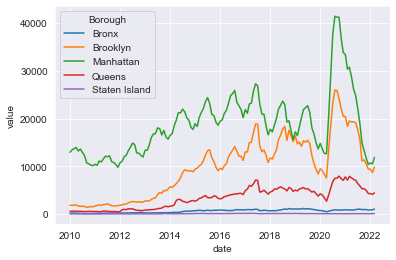

In [31]:
sns.lineplot(data=df, x='date', y='value', hue='Borough')